# Explore Previously Made Models
### Matthew Muller
11/29/2022

## General Housekeeping

In [1]:
##########
# Library Imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA, NMF, KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, confusion_matrix
from joblib import load

from scipy.stats import kruskal, zscore

##########
# Set/Append Working directory
%cd ~/Documents/RugglesLab/platelet-activity
sys.path.append('/Users/muller/Documents/RugglesLab')

##########
# Import Functions
%cd ~/Documents/RugglesLab/platelet-activity
from MattTools.plotting import plot_roc_curve, plot_confusion_matrix, plot_training_roc_curve_ci, plot_roc_curve_ci
from MattTools.plotting import plot_pca, plot_scree, plot_training_probas
from MattTools.stats import bootstrap_auc_confidence

/Users/muller/Documents/RugglesLab/platelet-activity
/Users/muller/Documents/RugglesLab/platelet-activity


## Load in data
Here we load in:
- Pace
- Duke
- Models

In [129]:
## Load in saved models
models = [
        # load('models/jobs/rf-testing.joblib')[-1], # this is a pipe, so I'm selecting just the model
        # load('models/jobs/extraTrees_trained_auc89.joblib')[-1], # this is a pipe, so I'm selecting just the model
        load('models/jobs/extraTrees_trained_acc76.joblib')[-1], # this is a pipe, so I'm selecting just the model
        # load('models/jobs/lasso_trained_longgroup.joblib')[-1], # this is a pipe, so I'm selecting just the model
        # load('models/jobs/lasso_trained_acc74.joblib')[-1], # this is a pipe, so I'm selecting just the model
        # load('models/jobs/press_subset_rf.joblib')[-1], # this is a pipe, and also needs subsetted inputs (see below)
        ]

## Load in pace data
path = 'data/clean/'
X_pace = pd.read_csv(path+'pace/features.csv')
y_pace = pd.read_csv(path+'pace/labels.csv').to_numpy()[:,0]


## Load in duke data
X_duke = pd.read_csv(path+'duke/features_group1.csv')
y_duke = pd.read_csv(path+'duke/labels_group1.csv').to_numpy()[:,0]

# ## Loading in data of subsets
# significant_subset = pd.read_csv(path+'gene_list_pace_duke_nominal_correlation.csv', index_col=0).values.ravel()
# nominal_subset = pd.read_csv(path+'gene_list_pace_duke_significant_correlation.csv', index_col=0).values.ravel()
# subset = significant_subset

# X_pace = pd.read_csv(path+'pace/features.csv')[subset].to_numpy()
# y_pace = pd.read_csv(path+'pace/labels.csv').to_numpy().ravel()

# X_duke = pd.read_csv(path+'duke/features_group1.csv')[subset].to_numpy()
# y_duke = pd.read_csv(path+'duke/labels_group1.csv').to_numpy().ravel()



X_pace_subset = pd.read_csv('output/plt_wb_data_processing__2023-03-14/plt_counts_hypercohort_wb_antiplt.csv', index_col=0).T
y_pace_subset = pd.read_csv('output/plt_wb_data_processing__2023-03-14/metadata__hypercohort_wb_antiplt.csv')
y_pace_subset = y_pace_subset['hypercohort'].map({"nothyper":0, "hyper":1}).to_numpy()

X_pace_subset = X_pace_subset.T.sort_index().T


## Load in data


In [130]:
for model in models:
    print(model.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 741543, 'verbose': 0, 'warm_start': False}


## Feature Importance of Models
Model feature (gene) importance examined through mean decrease in impurity from each feature

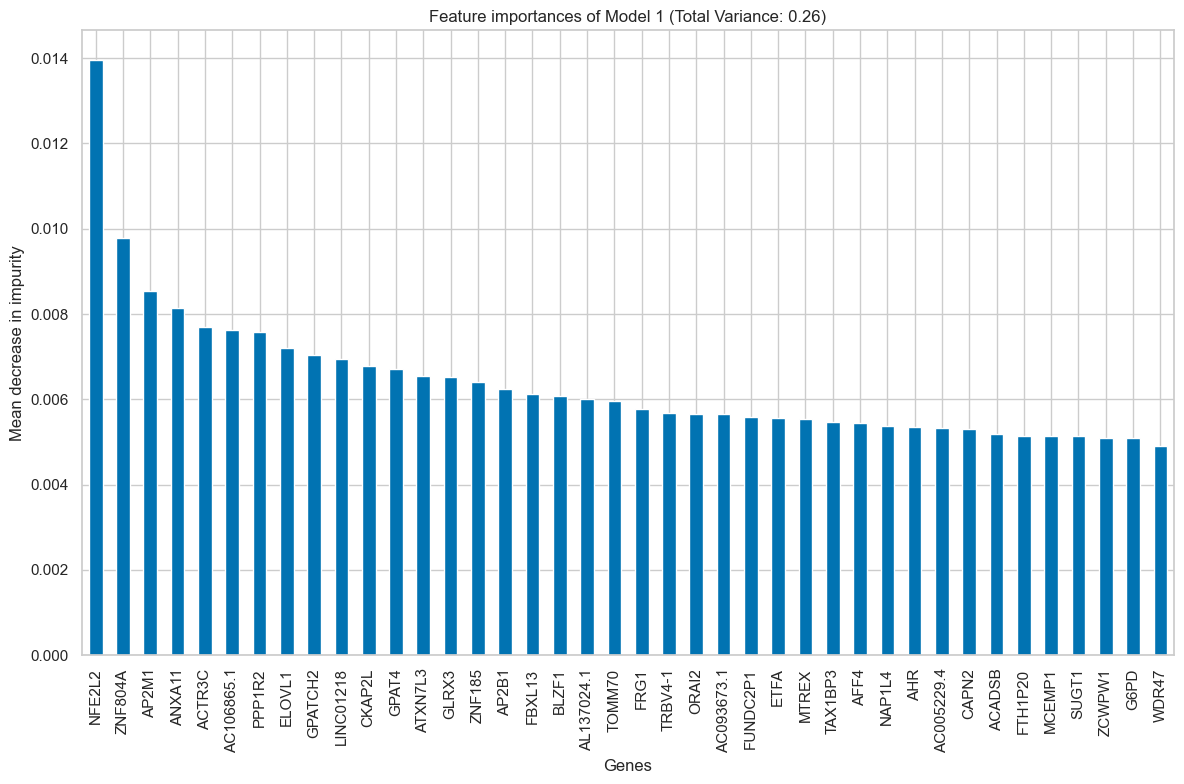

In [133]:
for idx, model in enumerate(models):
    ## Feature Selection
    pace_importances = model.feature_importances_
    genes = pd.read_csv('data/clean/press_genes.csv', header=None)[0]
    # genes = subset

    ## Plot top 20 most important features in pace
    forest_importances = pd.Series(pace_importances, index=genes)
    forest_importances = forest_importances.sort_values(ascending = False)[0:40]

    fig, ax = plt.subplots(figsize=(12, 8))
    forest_importances.plot.bar(ax=ax)
    ax.set_title(f"Feature importances of Model {idx+1} (Total Variance: {forest_importances.sum():.2f})")
    ax.set_ylabel("Mean decrease in impurity")
    ax.set_xlabel("Genes")
    fig.tight_layout()
    plt.show()

## Training results for models
- Bootstrapped ROC AUC curves for CV training within the models
- boxplots of prediction probability for the models

/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


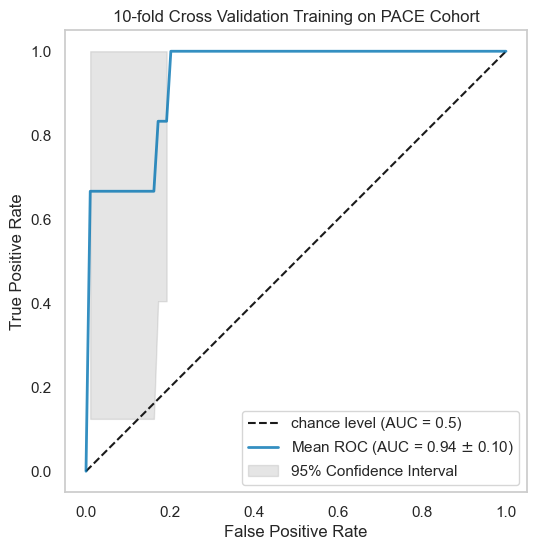

p-value is 0.0025184111607908445


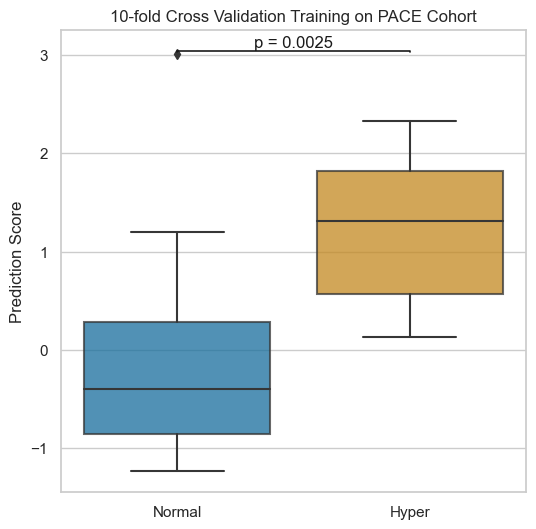

In [127]:
## Bootstrapped ROC AUC curves for CV training
for model in models:
    plot_training_roc_curve_ci(
        model, X_pace_subset, y_pace_subset,
        fill=True,
        title='10-fold Cross Validation Training on PACE Cohort',
        cv_splits=6,
        # save_path = '/Users/muller/Documents/RugglesLab/publications/pace_press/Pace Edits/training_roc.pdf'
        )

    plot_training_probas(
        model, X_pace_subset, y_pace_subset,
        title='10-fold Cross Validation Training on PACE Cohort',
        plot='boxplot',
        cv_splits=6,
        # save_path = '/Users/muller/Documents/RugglesLab/publications/pace_press/Pace Edits/pace_boxplot.pdf'
    )

/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


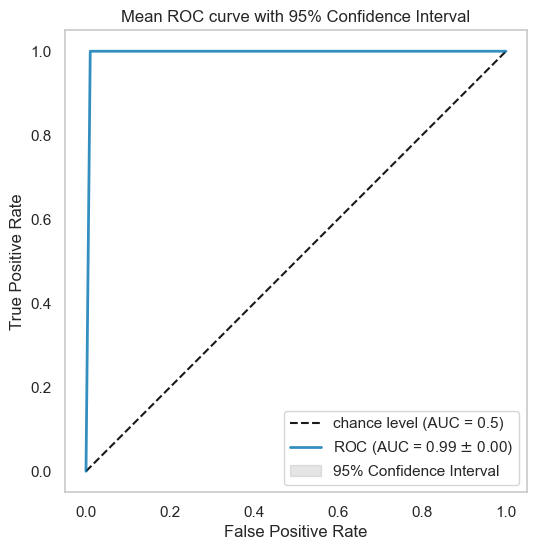

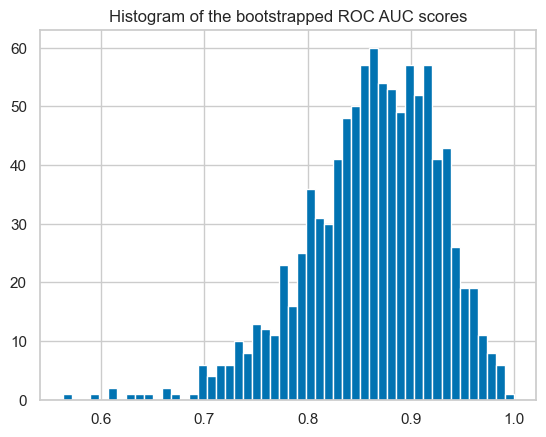

Confidence interval for the score: 0.862 [0.858 - 0.866]


In [126]:
## Bootstrapped ROC AUC curves
for model in models:
    plot_roc_curve_ci(
        model, X_pace_subset, y_pace_subset.reshape(-1,1),
        cv_splits=6, 
        stratified=True,
        # save_path='/Users/muller/Desktop/Pace Edits/roc_curve.pdf'
        )
    bootstrap_auc_confidence(
        model.predict_proba(X_duke)[:,1],
        y_duke,
        n_bootstraps=1000, 
        plot_histogram=True
        )

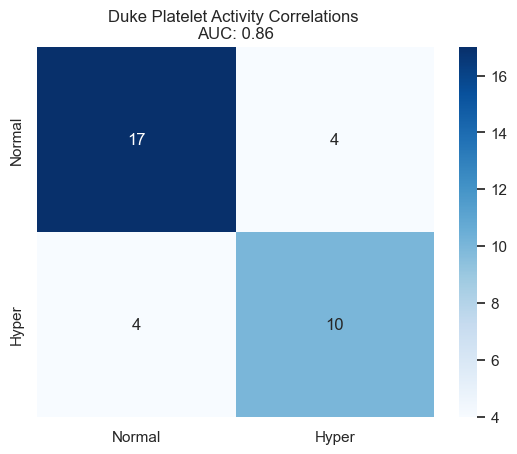

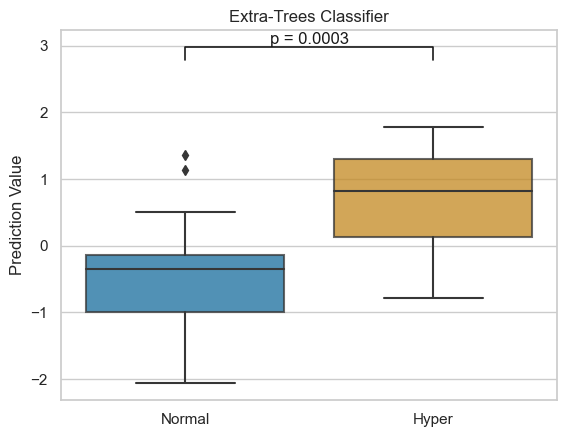

In [125]:
## Boxplots of Duke Hyper v. Hypo
features, labels = X_duke, y_duke
for idx, model in enumerate(models):
    # Predict and graph things
    preds = model.predict(features)
    conf_matrx = confusion_matrix(labels, preds)
    auc_score = roc_auc_score(labels, model.predict_proba(features)[:,1])


    sns.heatmap(conf_matrx, xticklabels=["Normal", "Hyper"], yticklabels=["Normal", "Hyper"],
                cmap="Blues", annot=True, fmt='g').set_title(f"Duke Platelet Activity Correlations \nAUC: {auc_score:.2f}")
    plt.show()

    # Weird results here, so I figure making a histogram of the model is helpful
    sns.set_theme(style="whitegrid", palette="colorblind")
    df = pd.DataFrame({'preds' : model.predict_proba(features)[:,1]}).apply(zscore)
    df['labels'] = labels
    df['labels'] = df['labels'].map({0:"Normal", 1:"Hyper"})
    sns.boxplot(
        df, x='labels', y='preds', 
        order=["Normal", "Hyper"], boxprops={'alpha': 0.75}
        ).set(ylabel="Prediction Value", xlabel=None, title=f"Extra-Trees Classifier")
    # sns.stripplot(
    #     df, x='labels', y='preds',
    #     color = 'black', alpha = 0.75,
    #     order=["Normal", "Hyper"]
    #     ).set(ylabel="Prediction Value", xlabel=None)

    # Significance Testing (kruskal-wallis for nonparametric analysis)    
    kruskal_wallis = kruskal(df.loc[df['labels'] == "Normal"]['preds'], df.loc[df['labels'] == "Hyper"]['preds'])
    if kruskal_wallis[1] < 0.05:
        # statistical annotation
        x1, x2 = 0, 1
        y, h = df['preds'].max()+1, 0.2
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        plt.text((x1+x2)*.5, y+h, f"p = {kruskal_wallis[1]:.4f}",
                 ha='center', va='bottom', color='k')
    plt.savefig('/Users/muller/Documents/RugglesLab/publications/pace_press/Pace Edits/duke_voilin.pdf')
    plt.show()


## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone

# Regrabbing it so I have feature names
X_pace = pd.read_csv(path+'pace/features.csv')

for model in models:
    sfm = SelectFromModel(model, prefit=True, threshold='mean')
    X_new = sfm.transform(X_pace)
    print(f'{model} produced a feature subset of size {X_new.shape}')
    features = X_pace.columns[sfm.get_support()]
    print(f'The features chosen are: {features.to_list()}\n')

    print(classification_report(y_duke, clone(model).fit(X_new, y_pace).predict(sfm.transform(X_duke))))

In [ ]:
### Model Disease Correlations
### Load in disease gene ratio data
sle_ratios = pd.read_csv('data/clean/model_validation/sle/sle_features_labels.csv', index_col=0)
male_ratios = pd.read_csv('data/clean/model_validation/male/male_features_labels.csv', index_col=0)
mace_ratios = pd.read_csv('data/clean/model_validation/mace/mace_features_labels.csv', index_col=0)
covid_ratios = pd.read_csv('data/clean/model_validation/covid/covid_features_labels.csv', index_col=0)
pad_ratios = pd.read_csv('data/clean/model_validation/pad/pad_features_labels.csv', index_col=0)
harp_ratios = pd.read_csv('data/clean/model_validation/harp/harp_features_labels.csv', index_col=0)


### Load in disease gene ratio data
# sle_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/sle_gene_ratios_filtered_pace_60', index_col=0)
# male_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/male_gene_ratios_filtered_pace_60', index_col=0)
# mace_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/mace_gene_ratios_filtered_pace_60', index_col=0)
# covid_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/covid_gene_ratios_filtered_pace_60', index_col=0)
# pad_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/pad_gene_ratios_filtered_pace_60', index_col=0)
# harp_ratios = pd.read_csv('data/clean/gene_ratios/disease_ratios/harp_gene_ratios_filtered_pace_60', index_col=0)

disease_ratios = {'sle':sle_ratios, 'male':male_ratios, 'mace':mace_ratios, 
                  'covid':covid_ratios, 'pad':pad_ratios, 'harp':harp_ratios}

male_ratios
### Prediction Results

for key in disease_ratios.keys():
    print(f'##################################### Current Disease: {key.upper()} #####################################')
    
    features = disease_ratios[key].drop('cohort', axis=1)
    labels = disease_ratios[key]['cohort']

    print(classification_report(labels, model.predict(features)))

    plot_roc_curve(labels, model.predict_proba(features)[:,1])


        # Predict and graph things
    preds = model.predict(features)
    conf_matrx = confusion_matrix(labels, preds)
    auc_score = roc_auc_score(labels, model.predict_proba(features)[:,1])


    sns.heatmap(conf_matrx, xticklabels=["Normal", "Hyper"], yticklabels=["Healthy", key],
                cmap="Blues", annot=True, fmt='g').set_title(f"{key} Platelet Activity Correlations \nAUC: {auc_score:.2f}")
    plt.show()


    # Weird results here, so I figure making a histogram of the model is helpful
    sns.set_theme(style="whitegrid", palette="colorblind")
    df = pd.DataFrame({'preds' : model.predict_proba(features)[:,1]}).apply(zscore)
    df['labels'] = labels.values
    df['labels'] = df['labels'].map({0:"Normal", 1:key})
    sns.boxplot(
        df, x='labels', y='preds', 
        order=["Normal", key], boxprops={'alpha': 0.75}
        ).set(ylabel="Prediction Value", xlabel=None)
    sns.stripplot(
        df, x='labels', y='preds',
        color = 'black', alpha = 0.75,
        order=["Normal", key]
        ).set(ylabel="Prediction Value", xlabel=None)

    # Significance Testing (kruskal-wallis for nonparametric analysis)    
    kruskal_wallis = kruskal(df.loc[df['labels'] == "Normal"]['preds'], df.loc[df['labels'] == key]['preds'])
    if kruskal_wallis[1] < 0.05:
        # statistical annotation
        x1, x2 = 0, 1
        y, h = df['preds'].max()+0.01, 0.01
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        plt.text((x1+x2)*.5, y+h, f"p = {kruskal_wallis[1]:.4f}",
                 ha='center', va='bottom', color='k')

    plt.show()